# Schémas Upwind et de Godunov pour les sytèmes linéaires hyperboliques - Application aux équations d'Euler linéarisées

_Consignes:_
* _Ce TP est noté et à rendre (au plus tard) pour le 21/12/2023._
* _Le TP peut être fait en binôme_
* _La partie 1.1 (Théorie) est facultative, elle permet à ceux qui le souhaitent de travailler le cours_
* _Toute la partie 1.2 est à compléter, sauf la partie 1.2.2 qui donne lieu à un bonus_
* _Une fois terminé, le TP est à envoyer à maxime.bouyges@onera.fr avec le nom suivant : TP1-NOM1\_PRENOM1-NOM2\_PRENOM2.ipynb_

## Théorie : Schémas Upwind et Godunov pour les systèmes linéaires
Dans toute la suite, on considère un système d'équations de transport linéaires écrit sous la forme
$$
\partial_t U + A\partial_x U = 0
$$
où $A$ est une matrice à coefficients constants et $U$ est un vecteur de taille $n$.

La suite de ce paragraphe a été traité en cours. Le système étant hyperbolique, la matrice $A$ est diagonalisable dans $\mathbb{R}$ : $A = RDR^{-1}$. Le système peut alors être exprimé avec le vecteur des variables caractéristiques et la matrice diagonale $D$
$$
\partial_t V + D \partial_x V = 0,
$$
avec $V=R^{-1}U =(v^1,v^2,...,v^n)$. Ce système représente en fait $n$ équations indépendantes:
$$
\partial_t v^j + \lambda^j \partial_x v^j = 0,~~~\forall j \leq n.
$$


### Schéma Upwind
Dans cette partie, on détermine l'expression du flux Upwind pour le système linéaire hyperbolique. On rappelle que le flux Upwind pour une équation scalaire s'écrit
$$
f_{i+1/2}(v_i,v_{i+1}) = \left\{
        \begin{aligned}
        v_i~\text{si}~\lambda > 0 \\
        v_{i+1}~\text{sinon}
        \end{aligned}
    \right.
$$
ce qui revient à écrire
$$
f_{i+1/2}(v_i,v_{i+1}) = \max(\lambda,0) v_i + \min(\lambda, 0) v_{i+1}.
$$

#### Question 1
On commence par appliquer le flux Upwind à chacune des $n$ équations scalaires indépendantes portant sur les variables caractéristiques $v^j$. On omet désormais l'exposant sur les variables scalaires $v^j \rightarrow v$. En introduisant les notations
$$
\begin{aligned}
& \lambda^+ = \max(\lambda,0) = \dfrac{1}{2}(\lambda + |\lambda|), \\
& \lambda^- = \min(\lambda,0) = \dfrac{1}{2}(\lambda - |\lambda|), \\
\end{aligned}
$$
**montrez** que le schéma Upwind l'expression du flux Upwind appliqué à l'équation scalaire
$$
\partial_t v + \lambda \partial_x v = 0
$$
s'écrit (ici $i$ ne désigne plus la composante de $v$ mais l'indice d'une cellule)
$$
v_i^{n+1} = v_i^n - \dfrac{\Delta t}{\Delta x}\lambda_i^+(v_i^n - v_{i-1}^n) - \dfrac{\Delta t}{\Delta x}\lambda_i^-(v_{i+1}^n - v_i^n).
$$

#### Réponse 1


#### Question 2
On pose $D^+ = \mathrm{diag}(\lambda_1^+,...,\lambda_n^+)$ et $D^- = \mathrm{diag}(\lambda_1^-,...,\lambda_n^-)$; puis $A^+=RD^+R^{-1}$ et $A^-=RD^-R^{-1}$. Montrez que le schéma Upwind appliqué au système de départ s'écrit:
$$
U_i^{n+1}=U_i^n - \dfrac{\Delta t}{\Delta x}A^+(U_i^n-U_{i-1}^n) - \dfrac{\Delta t}{\Delta x}A^-(U_{i+1}^n-U_i^n).
$$

#### Réponse 2
à compléter

### Schéma de Godunov
Dans cette partie, on détermine l'expression du flux de Godunov pour le système linéaire hyperbolique. Rappelons que la méthode de Godunov consiste d'abord à résoudre de manière exacte le problème de Riemann à l'interface entre les deux cellules à partir d'états de part et d'autre dans la cellule (à l'ordre 1, ce sont simplement les valeurs $U_i$ et $U_{i+1}$. Puis la solution dans chaque cellule est formée à partir de la moyenne, dans la cellule, de la solution du problème de Riemann.

#### Schéma de Godunov appliqué à l'équation de transport linéaire scalaire
On commence par s'intéresser au cas linéaire scalaire:
$$
\partial_t u + \partial_x c u = 0,
$$
avec $c$ constant.

##### Question 1
En intégrant l'équation sur le domaine spatio-temporel $[x_1,x_2] \times [t_1, t_2]$, montrez qu'une solution de l'équation de transport linéaire scalaire vérifie la relation
$$
\int_{x_1}^{x_2}u(x,t_2) \mathrm{d}x = \int_{x_1}^{x_2}u(x,t_1) \mathrm{d}x + \int_{t_1}^{t_2} cu(x_1,t) \mathrm{d} t - \int_{t_1}^{t_2} c u(x_2,t) \mathrm{d} t.
$$

#### Réponse 1
à compléter

#####  Question 2
Rappeler la solution générale autosimilaire du problème de Riemann suivant
$$
\left\{
\begin{aligned}
    & \partial_t u + \partial_x c u = 0 \\
    & u_0(x) = \left\{
        \begin{aligned}
        & u_L~\forall x < 0 \\
        & u_R~\forall x > 0
        \end{aligned}
        \right.
\end{aligned}
\right.
$$

#### Réponse 2
à compléter

##### Question 3
On note $PR(u_{i-1}^n,u_i^n)$ le problème de Riemann qui s'applique à l'interface $i-1/2$. On a alors $u_L = u_{i-1}^n$ et $u_R = u_i^n$.

Soit $\hat{u}$ la combinaison des solutions des problèmes de Riemann $PR(u_{i-1}^n,u_i^n)$ et $PR(u_i^n,u_{i+1}^n)$ (c'est-à-dire aux deux faces de la cellule $i$). $\hat{u}$ est donc une solution exacte de l'équation de transport linéaire scalaire dans la cellule $i$. En utilisant la réponse de la première question, montrez que
$$
\int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}\hat{u}(x, \Delta t) \mathrm{d}x = \int_{x_{i-\frac{1}{2}}}^{x_{i+\frac{1}{2}}}\hat{u}(x, 0) \mathrm{d}x + \int_0^{\Delta t} c\hat{u}(x_{i-\frac{1}{2}},t) \mathrm{d} t - \int_0^{\Delta t} c \hat{u}(x_{i+\frac{1}{2}},t) \mathrm{d} t.
$$

#### Réponse 3
à compléter

##### Question 4
En appliquant l'approche volumes finis, montrez que l'expression établie à la question précédente peut se réécrire
$$
u_i^{n+1}=u_i - \dfrac{\Delta t}{\Delta x} \left( f_{i+1/2} - f_{i-1/2} \right).
$$

Explicitez $f_{i\pm1/2}$.

#### Réponse 4
à compléter

##### Question 5
En justifiant le fait que $\hat{u}(x_{i\pm1/2},t) = u^{Rie}_{i\pm1/2}(0)$, montrez que le flux de Godunov s'écrit
$$
f_{i-1/2} = cu_{i-1}^n,~~~f_{i+1/2} = cu_i^n
$$

Pour une équation de transport non nécessairement linéaire, on retiendra que le flux de Godunov s'écrit
$$
f^{god}_{i+1/2} = f\left(u^{Rie}_{i+1/2}(0) \right),
$$
où $u^R_{i+1/2}$ est la solution exacte du problème de Riemann associé à la face $i+1/2$.

#### Réponse 5
à compléter

##### Question 6
Comparez le flux de Godunov avec le flux upwind pour une équation de transport linéaire scalaire.

#### Réponse 6
à compléter

#### Schéma de Godunov appliqué à un système d'équations de transport linéaires
Puisque
* le schéma upwind appliqué à un système d'équations de transport linéaires est obtenu à partir du schéma upwind appliqué aux équations scalaire;
* dans le cas scalaire, les schémas upwind et Godunov sont identiques;
on en déduit que le schéma de Godunov appliqué à un système d'équations de transport linéaire est identique au schéma upwind.

## Application : coup de bélier dans une conduite unidimensionnelle
Nous allons étudier le phénomène dit du "coup de bélier" rencontré lorsque qu'un fluide en mouvement est brutalement interrompu, généralement par une paroi / vanne. C'est par exemple ce qui se passe lorsque qu'on ferme rapidement un robinet d'eau. On entend dans certains cas un bruit (voire une vibration) provoqué par une onde de pression dans le fluide qui vient frapper les parois des canalisations.

On se place dans un cadre unidimensionnel : un écoulement, avançant à la vitesse $u_0$, est stoppé à $t=0$ par un mur en $x=0$. Le domaine d'étude s'étend de $x=-l$ à $x=0$. Cet écoulement est supposé être régi par les équations d'Euler isothermes. Celles-ci s'écrivent
$$
∂_t Q + ∂_x F(Q) = 0
$$
avec
$$
Q =
\begin{pmatrix} \rho \\ \rho u \end{pmatrix}
~~~\mathrm{et}~~~
F(Q)=
\begin{pmatrix} \rho u \\ \rho u^2 + p \end{pmatrix}
$$
auxquelles on ajoute une équation d'état (thermodynamique) permettant de déterminer la pression : $p = c^2 \rho$, où $c$ est la vitesse du son. Ce système d'équation est non-linéaire.

Pour étudier les ondes de pression générées par cet arrêt, on ajoute une petite perturbation de masse volumique et de vitesse à l'écoulement initial (supposé uniforme et constant dans le temps). Plus précisément, on pose:
$$
\rho = \rho_0 + \tilde{\rho} ~~~\mathrm{et}~~~ u = u_0 + \tilde{u}.
$$

Remarque : l'état $(\rho_0, u_0)$ est appelé "écoulement de base" ou parfois "écoulement moyen". Cette dernière dénomination peut-être trompeuse car cet écoulement n'est pas nécessairement constant comme ici. L'état $(\tilde{\rho}, \tilde{u})$ est appelé la "perturbation" ou la "partie fluctuante".

**Conditions initiales**
À $t=0$ l'écoulement vient d'être arrêté en $x=0$. À cette position, on écrit donc $u(0,0)=0$. Or comme $u=u_0+\tilde{u}$, on a $\tilde{u}(x=0,t=0) = -u_0$. Ailleurs, pour $x < 0$, l'écoulement n'a pas encore "ressenti" l'arrêt et on a donc $u(x<0, t=0)=u_0$ et ainsi $\tilde{u}(x<0,t=0) = 0$. Quant à la masse volumique, on a toujours $\tilde{\rho}(x, t=0) = 0$.

**Hypothèse importante**: dans toute la suite, on suppose l'écoulement de base subsonique, c'est-à-dire $u_0 < c$.

### Questions théoriques

#### Question 1
Sachant que
* $(\rho, u)$ vérifient les équations d'Euler isothermes;
* $(\rho_0, u_0)$ vérifient aussi les équations d'Euler isothermes (et sont uniformes et constant dans le temps);
* les perturbations sont de faible amplitude comparées à l'écoulement de base : $\tilde{\rho}, \tilde{u} << \rho_0, u_0$;

montrez que $(\tilde{\rho},\tilde{u})$ vérifie le système d'équations ci-dessous. Si nécessaire, on pourra rendre l'hypothèse de petite perturbation plus évidente en écrivant $\rho = \rho_0 + \varepsilon \tilde{\rho}$ et $u = u_0 + \varepsilon \tilde{u}$ avec $\varepsilon << 1$.
$$
\left\{
    \begin{aligned}
        & \partial_t \tilde{\rho} + \partial_x \left( \tilde{\rho} u_0 + \rho_0 \tilde{u} \right) = 0, \\
        & \partial_t \left(\tilde{\rho} u_0  + \rho_0 \tilde{u} \right) + \partial_x \left(\tilde{\rho}u_0^2 + 2 \rho_0 u_0 \tilde{u} + c^2 \tilde{\rho} \right) = 0.
    \end{aligned}
\right.
$$

#### Réponse 1
à compléter

#### Question 2
En rappelant que l'écoulement de base $(\rho_0, u_0)$ est uniforme et constant (dans le temps), montrer que le système précédemment établi peut se réécrire
$$
\left\{
    \begin{aligned}
        & \partial_t \tilde{\rho} + \partial_x \left( \tilde{\rho} u_0 + \rho_0 \tilde{u} \right) = 0, \\
        & \partial_t \tilde{u} + \partial_x \left( u_0 \tilde{u} + c^2 / \rho_0 \tilde{\rho} \right) = 0.
    \end{aligned}
\right.
$$
Ce système correspond aux **équations d'Euler isothermes linéarisées**.

#### Réponse 2
à compléter

#### Question 3
Ce système est légèrement du système établi en cours, pour lequel on avait considéré $u_0$ nul. Après avoir rappelé l'expression du flux $F$ correspondant à ce sytème, montrer que la matrice jacobienne du système s'écrit:
$$
A = \dfrac{\partial F}{\partial U} = \begin{pmatrix} u_0 & \rho_0 \\ \dfrac{c^2}{\rho_0} & u_0 \end{pmatrix}.
$$

#### Réponse 3
à compléter

#### Question 4
Montrer que les valeurs propres de la matrice jacobienne sont $\lambda_1 = u_0 - c$ et $\lambda_2 = u_0 + c$.

#### Réponse 4
à compléter

#### Question 5
Montrer que les vecteurs propres associés aux valeurs propres déterminées précédemment peuvent s'écrire:
$$
R^{(1)} = \begin{pmatrix} 1 \\ -c / \rho_0 \end{pmatrix} ~~~\mathrm{et}~~~ R^{(2)} = \begin{pmatrix} 1 \\ c / \rho_0 \end{pmatrix}
$$

#### Réponse 5
à compléter

#### Question 6
Formez la matrice de changement de base $R = (R^{(1)},R^{(2)})$ et calculez $R^{-1}$.

#### Réponse 6
à compléter

#### Question 7
Rappelez les définitions de $D$, $D^+$ et $D^-$. À l'aide de ces définitions, de $R$ et de $R^{-1}$, montrer que
$$
A^- = \dfrac{u_0 - c}{2} \begin{pmatrix}
1 & -\rho_0 / c \\
- c / \rho_0 & 1
\end{pmatrix}
$$
et
$$
A^+ = \dfrac{u_0 + c}{2} \begin{pmatrix}
1 & \rho_0 / c \\
c / \rho_0 & 1
\end{pmatrix}.
$$

#### Réponse 7
à compléter

#### Question 8
Rappelez l'expression du schéma Upwind appliqué à un système d'équation linéaires dont la matrice jacobienne est notée $A$. On utilisera une discrétisation temporelle explicite.

#### Réponse 8
à compléter

### Bonus : vérification avec du calcul symbolique
<font color='red'>Cette partie est facultative mais donne lieu à un bonus</font>

Dans cette partie, on se propose de vérifier les résultats des questions précédentes à l'aide de calcul symbolique. Faire du calcul symbolique (avec un ordinateur) signifie "faire des calculs à la main" avec un ordinateur. Les différents symboles manipulés $c$, $\rho_0$ etc n'ont pas de valeur numérique.

Avec python, il est possible de faire du calcul symbolique avec **sympy**. On commence par importer le module et définir les symboles dont nous allons nous servir.

In [ ]:
from sympy import *
rho_0, u_0, rho, u, c, x = symbols("rho_0 u_0 rho u c x")

Note : pour afficher une grandeur que l'on vient de calculer, il suffit d'écrire son symbole sur la dernière ligne d'une cellule. Exemple:

In [ ]:
x = rho_0 * u_0
x

Il est également possible d'utiliser la méthode ``display``:

In [ ]:
x = c**2
display(x)

#### Question 1
On suppose le système d'équations établi (on aurait également pu l'établir avec sympy).

Regardez dans la documentation (https://docs.sympy.org/latest/modules/matrices/matrices.html) comment définir des vecteurs / matrices avec **sympy**. Définissez le vecteur des inconnues $U=(\rho, u)$ et le vecteur flux $F$.

#### Question 2
Toujours dans la même page de documentation, trouvez comment calculer la matrice jacobienne $A = \partial F / \partial U$. Calculer $A$.

#### Question 3
Toujours dans la même page de documentation, trouvez comment déterminer les valeurs propres de $A$. Attention, la fonction de **sympy** renvoie un dictionnaire dont les clés sont les valeurs propres et les valeurs sont les multiplicités associées. L'option ``multiple = True`` permet de retourner une liste.

Réordonnez (si nécessaire), les valeurs propres dans l'ordre croissant ($\lambda_1 < \lambda_2$).

Note : vous devez réaliser cette opération "manuellement" car sympy ne sait rien du signe $c$. Toutefois, il serait possible de spécifier à sympy que $c$ est positive et on pourrait alors lui demander de ranger par ordre croissant.

#### Question 5
Toujours dans la même page de documentation, trouvez comment calculer les vecteurs propres de $A$.

Notez que puisque cette fonction retourne également les valeurs propres de la matrice, on aurait finalement pu se passer de la question précédente.

Réordonnez les si nécessaire. De plus, les vecteurs étant définis à une constante multiplicative près, on fera en sorte que $r_1 = 1$.

#### Question 6
Formez la matrice $R$ à partir de $R_1$ et $R_2$. On pourra d'abord calculer sa transposée pour simplifier. 

Note : sympy propose également la fonction ``diagonalize`` qui renvoie directement $R$ et $D$. On aurait donc pu se passer de la question précédente.

La matrice $R$ déterminée avec sympy est-elle identique à celle déterminée dans la partie théorique précédente? Pourquoi?

#### Question 7
Calculez $R^{-1}$.

#### Question 8
Formez $D^+$ et $D^-$ puis calculez $A^+$ et $A^-$.

### Implémentation en python
Dans cette partie, on se propose de simuler le phénomène du coup de bélier avec un code python. Après avoir proposé une trame pour ce code, complétez le code python à trous. Le maillage, 1D, sera uniforme. Ci-dessous, on importe les modules nécessaires, on définit des constantes et on construit le maillage. **Le code de la prochaine cellule n'est pas à modifier**, sauf éventuellement pour modifier les réglages.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Physical settings
xmin = 1 # domain width
c = sqrt(1.4 * 287 * 293) # sound velocity for a temperature of 293K
u_0 = 1
rho_0 = 1

# Numerical settings
ncells = 100 # Number of mesh cells

# Uniform mesh
nnodes = ncells + 1
xnodes = np.linspace(-xmin, 0, nnodes)
dx = xnodes[1] - xnodes[0]
xcenters = np.zeros(ncells)
for i in range(ncells):
    xcenters[i] = 0.5*(xnodes[i] + xnodes[i+1])

#### Question 1
Proposer une squelette de code permettant d'intégrer le système des équations d'Euler isothermes linéarisées avec une intégration temporelle explicite et un schéma upwind. Votre réponse contiendra notamment le nom des différentes fonctions. Par exemple:
```
executer
  calcul_jacobienne
  calcul_flux
  increment_solution    
```

#### Réponse 1
à compléter

In [5]:
def calcul_flux(rho_0, rho, u_0, u, c):
    return np.array([[u_0*rho_t + rho_0*u_t],[u_0*u_t + c**2/rho_0*rho_t]])

#### Question 2 : calcul des matrices "jacobiennes"
Commençons par définir une fonction calculant les deux matrices $A^-$ et $A^+$ à partir des données du problème. **Complétez** la fonction suivante renvoyant ces deux matrices.

In [6]:
def jacobian_pm(rho_0, u_0, c):
    """
    Compute upwind flux on interface defined by the two states U_L and U_R
    
    U_L and U_R are two vectors containing respectively the state in the left cell
    and the state in the right cell.
    
    A_p and A_m are the two jacobian matrices that must be return

    """
    
    A_m = ((u_0 - c) / 2) * np.array([[1, -rho_0/c], [-c/rho_0, 1]])
    A_p = ((u_0 + c) / 2) * np.array([[1, rho_0/c], [c/rho_0, 1]])


    
    return A_p, A_m

#### Question 3 : calcul du flux Upwind
Une fois ces matrices à disposition, on peut facilement calculer le flux upwind sur une face. **Complétez** la fonction suivante.

In [17]:
def F_upwind(U_L, U_R, A_p, A_m):
    """
    Compute upwind flux on interface defined by the two states U_L and U_R
    
    U_L and U_R are two vectors containing respectively the state in the left cell
    and the state in the right cell.
    
    A_p and A_m are the two jacobian matrices.
    
    The flux vector must be returned.
    """

    f = A_m @ U_R + A_p @ U_L

    return f

#### Question 4 : intégration explicite
Rappeler l'expression du schéma d'intégration temporelle explicite en 1D.

$v_{n+1} = v_n + \frac{\Delta t}{\Delta x} (F^n_{i+\frac{1}{2}} - F^n_{i-\frac{1}{2}})$

#### Question 5 : boucle sur les faces
Pour calculer $U^{n+1}$ à partir de $U^n$, il est possible de faire une boucle sur les cellules et, dans chaque cellule, calculer $F_{i+\frac{1}{2}}$ et $F_{i-\frac{1}{2}}$ pour déterminer $U^{n+1}_i$ à partir de $U^n_i$. 

Toutefois, cette stratégie nécessite de calculer deux fois le flux sur chaque face. Par exemple la cellule $i=1$ va "calculer" le flux $F_{i+\frac{1}{2}} = F_\frac{3}{2}$ et la cellule $j=2$ va "calculer" le flux $-F_{j-\frac{1}{2}} = -F_\frac{3}{2}$.

Il est donc plus judicieux de calculer au préalable le flux sur chaque face, puis de faire la boucle sur les cellules et d'utiliser ces flux précalculés en les multipliant par la normale à la face.

La fonction suivante, à **compléter**, réalise cette opération.

In [18]:
def compute_flux(rho, u, u_0, A_p, A_m):

    U = np.block([[rho], [u]]).T

    flux = np.zeros((U.shape[0] - 1, 2))
    for i in range(len(flux)):
        flux[i] = F_upwind(U[i-1], U[i], A_p, A_m)
    return flux

#### Question 6 : itérations temporelles
**Complétez** la fonction suivante qui met bout à bout le travail effectué jusqu'à présent pour effectuer les itérations temporelles. Afin de voir la progression de l'onde et pas seulement la dernière itération, on enregistrera la solution à chaque pas de temps dans deux tableaux `rho_saved` et `u_saved`.

In [42]:
def solve(rho_0, u_0, c, nite, ncells, dx, dt):
    """
    Execute `nite` time steps of `dt`
    
    rho_0, u_0 and c are three constant scalars.
    
    nite, ncells, dx and dt are numerical parameters
    (number of time steps, number of cells, mesh step, time step)
    
    This function must return the solution at each time step. So two
    matrices (one for rho, one for u) must be returned. The first dimension
    of each matrix is the number of cells, the second dimension is the time step
    """         
    rho_saved = np.zeros((ncells, nite))
    u_saved = np.zeros((ncells, nite))

    u_saved[:, 0] = 0
    rho_saved[:, 0] = 0

    A_p, A_m = jacobian_pm(rho_0, u_0, c)

    for i in range(1, nite):

        Fict_rho = np.block([[rho_saved[0, i], rho_saved[:, i], -rho_saved[-1, i]]])
        Fict_u = np.block([[u_saved[0, i], u_saved[:, i], -u_saved[-1, i] - 2*u_0]])
        F = compute_flux(Fict_rho, Fict_u, u_0, A_p, A_m)

        for j in range(ncells):

            rho_saved[j, i] = rho_saved[j, i-1] - dt/dx*(F[j+1, 0] - F[j, 0])
            u_saved[j, i] = u_saved[j, i-1] - dt/dx*(F[j+1, 1] - F[j, 1])
            print(F[j, 0], F[j+1, 1])
            print(rho_saved[j, i], rho_saved[j, i-1])

    return rho_saved, u_saved

#### Question 7 : le pas de temps
Comment choisir le pas de temps `dt` de la simulation? Justifiez.

CFL

#### Question 8 : c'est parti
Utiliser la fonction ```solve``` définie ci-dessus et tracez trois figures pour représenter l'évolution temporelle de la masse volumique, de la vitesse et de la pression dans la canalisation. On affichera au choix les valeurs des perturbations ou des grandeurs totales.

**Commentez** cette évolution (d'un point de vue physique).

-1.0029144809677353 0.0
-0.0010029144809677343 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0029144809677353 0.0
-0.0020058289619354686 -0.0010029144809677343
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0029144809677353 0.0
-0.003008743442903203 -0.0020058289619354686
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0029144809677353 0.0
-0.004011657923870937 -0.003008743442903203
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.0029144809677353 0.0
-0.005014572404838671 -0.004011657923870937
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.

IndexError: index 500 is out of bounds for axis 1 with size 10

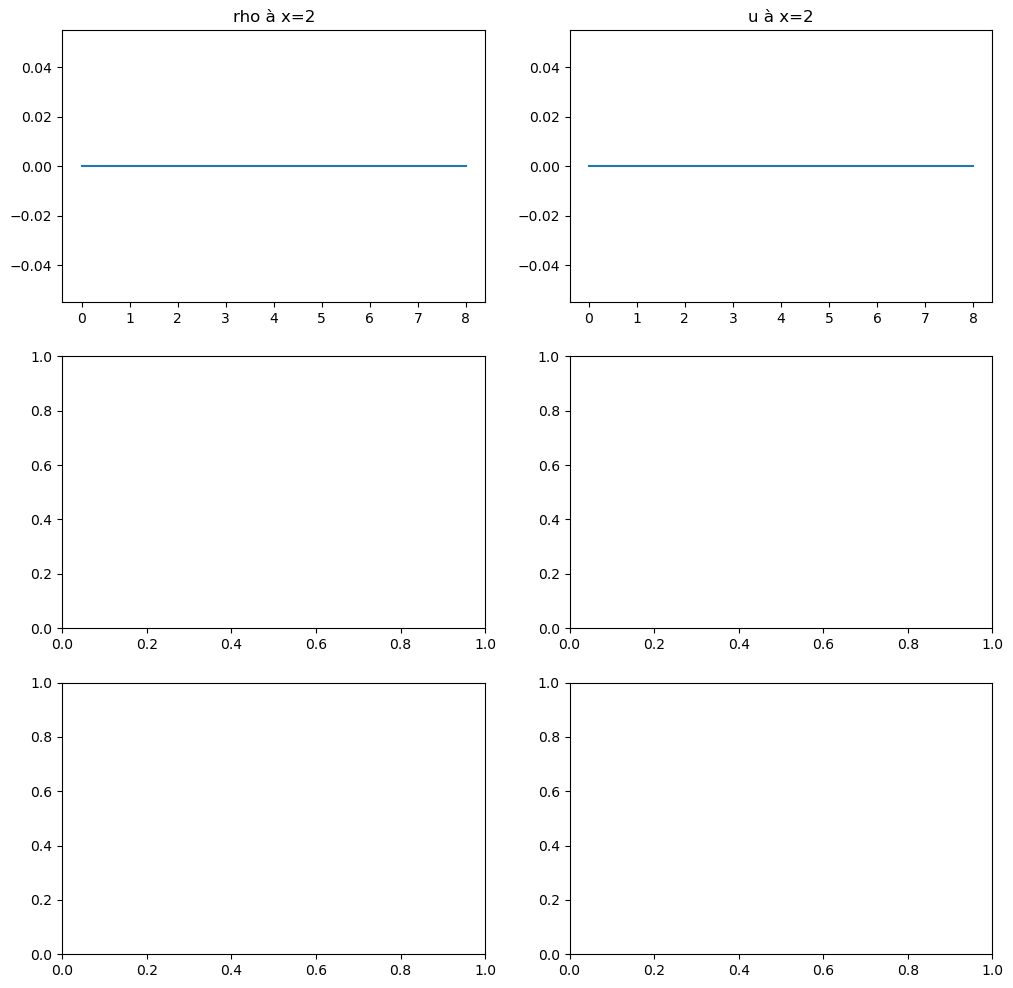

In [43]:
ncells = 10
rho, u = solve(rho_0, u_0, c, 10, ncells, dx, 1e-5)

times = [2, 500, 980]

i = 0
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for t in times:
    axs[i, 0].plot(rho[1:, t])
    axs[i, 0].set_title("rho à x="+str(t))
    axs[i, 1].plot(u[1:, t])
    axs[i, 1].set_title("u à x="+str(t))
    i+=1



### Question bonus
Réalisez une animation à partir de l'évolution temporelles des différentes grandeurs.

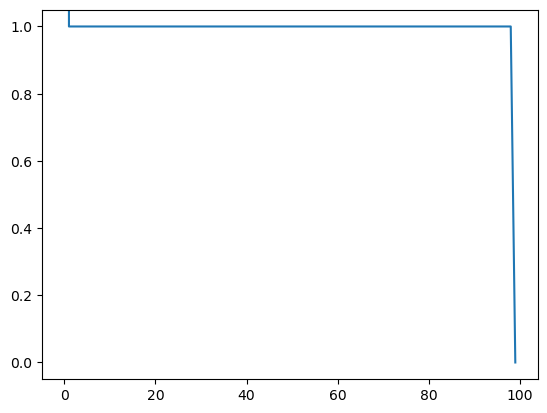

In [11]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

line, = ax.plot(u[:, 0])

def animate(i):
    line.set_ydata(u[:, i])  # update the data.
    return line,


ani = animation.FuncAnimation(fig, animate,interval=20, blit=True, save_count=50)
ani.save("movie.mp4")

plt.show()
